In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv("winequality-white.csv",sep=";")
print("Shape : ",data.shape,end="\n\n")
print("Columns : ",data.columns)

Shape :  (4898, 12)

Columns :  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [31]:
X=data[data.columns[:-1]]
X.shape

(4898, 11)

In [32]:
#Les variables
X=data[data.columns[:-1]]
X.shape

(4898, 11)

In [33]:
#Les étiquettes
Y=data[data.columns[-1]]
Y.shape

(4898,)

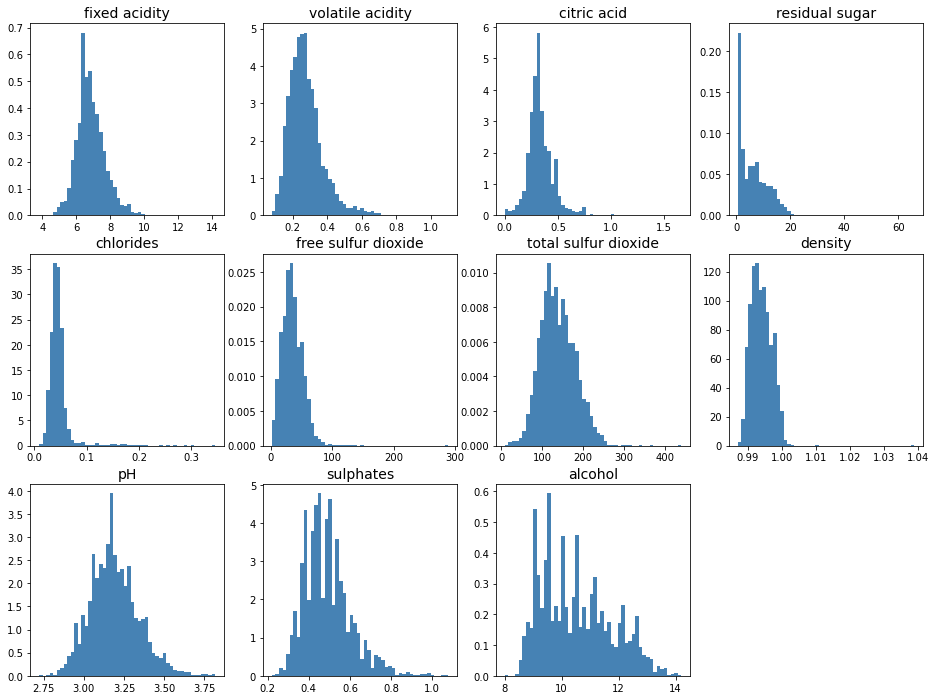

In [34]:
#Visualison nos variables 

fig=plt.figure(figsize=(16,12))

for feat_idx in range(X.shape[1]):
    axs=fig.add_subplot(3,4,(feat_idx+1))
    h=axs.hist(X.iloc[:,feat_idx],bins=50,color="steelblue",density=True,edgecolor='none')
    axs.set_title(data.columns[feat_idx],fontsize=14)
    

<BarContainer object of 6 artists>

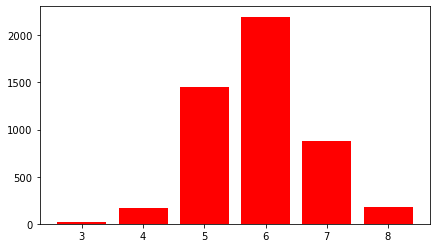

In [45]:
#Visualisation de nos étiquettes a l'aide des bar
fig=plt.figure(figsize=(7,4))
abcs=range(np.min(Y),np.max(Y))

plt.bar(abcs,[(a==Y).sum() for a in abcs],color='red')


In [36]:
#Supposons que pour qualité<6 il s'agit d'un vin pas terrible et qualité>6 un bon vin 

Y_class=np.where(Y<6,0,1)


In [37]:
print("Le nombre de vins classé comme 'pas terrible' : ",Y_class[Y_class==0].shape)

Le nombre de vins classé comme 'pas terrible' :  (1640,)


In [38]:
print("Le nombre de vins classé 'comme bons' :" ,Y_class[Y_class==1].shape)

Le nombre de vins classé 'comme bons' : (3258,)


In [39]:
from sklearn import model_selection

In [40]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y_class,test_size=0.3)

In [41]:
#Nous allons maintenant standarisé les données 
from sklearn import preprocessing

In [52]:
stc_scale=preprocessing.StandardScaler().fit(X_train)
X_train_std=stc_scale.transform(X_train)
X_test_std=stc_scale.transform(X_test)

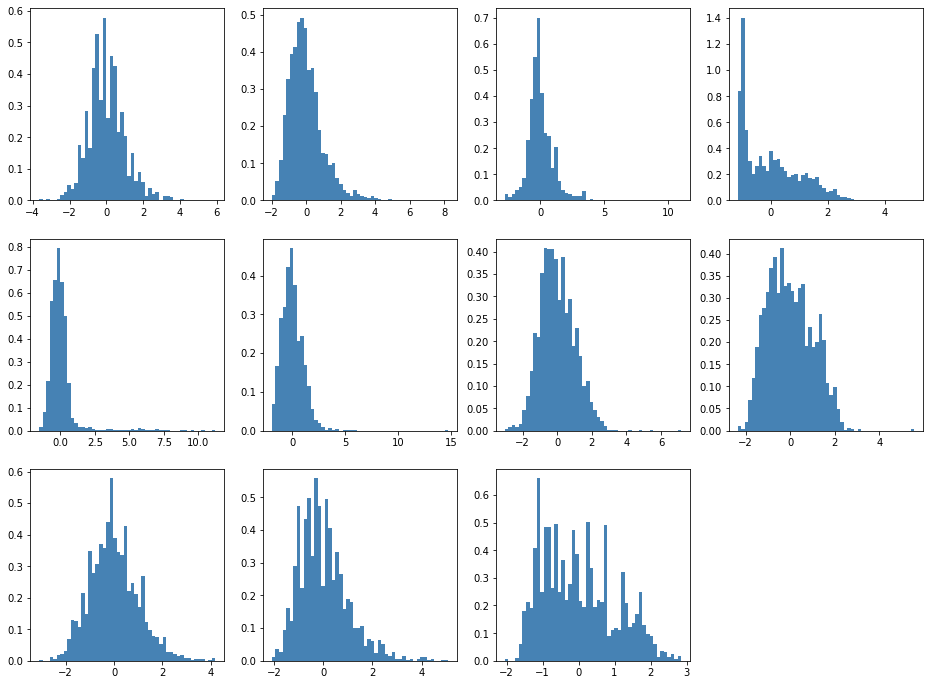

In [53]:
#Visionons encore une fois notre data standarié 
fig=plt.figure(figsize(16,12))

for feat_idx in range(X_train_std.shape[1]):
    axs=fig.add_subplot(3,4,(feat_idx+1))
    h=plt.hist(X_train_std[:,feat_idx],bins=50, density=True,color="steelblue", edgecolor='none')

    

In [54]:
from sklearn import metrics,neighbors 

In [55]:
param_grid={"n_neighbors":[3,5,7,9,11,13,15]}

score="accuracy"

clf=model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring=score 
    )

clf.fit(X_train_std,Y_train)

print("Meilleur hyperparametre sur le jeu d'entrainement : ")
print(clf.best_params_)




Meilleur hyperparametre sur le jeu d'entrainement : 
{'n_neighbors': 11}


In [56]:
print("Résultat de la validation croisée ")

for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Résultat de la validation croisée 
accuracy = 0.762 (+/-0.016) for {'n_neighbors': 3}
accuracy = 0.759 (+/-0.022) for {'n_neighbors': 5}
accuracy = 0.762 (+/-0.017) for {'n_neighbors': 7}
accuracy = 0.769 (+/-0.019) for {'n_neighbors': 9}
accuracy = 0.774 (+/-0.024) for {'n_neighbors': 11}
accuracy = 0.770 (+/-0.021) for {'n_neighbors': 13}
accuracy = 0.770 (+/-0.025) for {'n_neighbors': 15}


In [59]:
y_pred=clf.predict(X_test_std)

print("Sur le jeu test : {:.3f}".format(metrics.accuracy_score(Y_test,y_pred)))

Sur le jeu test : 0.761
